# EDA and Classification models on Seismic bumps Dataset



###Information
Attribute information:
1. seismic: result of shift seismic hazard assessment in the mine working obtained by the seismic
method (a - lack of hazard, b - low hazard, c - high hazard, d - danger state);
2. seismoacoustic: result of shift seismic hazard assessment in the mine working obtained by the
seismoacoustic method;
3. shift: information about type of a shift (W - coal-getting, N -preparation shift);
4. genergy: seismic energy recorded within previous shift by the most active geophone (GMax) out of
geophones monitoring the longwall;
5. gpuls: a number of pulses recorded within previous shift by GMax;
6. gdenergy: a deviation of energy recorded within previous shift by GMax from average energy recorded
during eight previous shifts;
7. gdpuls: a deviation of a number of pulses recorded within previous shift by GMax from average number
of pulses recorded during eight previous shifts;
8. ghazard: result of shift seismic hazard assessment in the mine working obtained by the
seismoacoustic method based on registration coming form GMax only;
9. nbumps: the number of seismic bumps recorded within previous shift;
10. nbumps2: the number of seismic bumps (in energy range [10^2,10^3)) registered within previous shift;
11. nbumps3: the number of seismic bumps (in energy range [10^3,10^4)) registered within previous shift;
12. nbumps4: the number of seismic bumps (in energy range [10^4,10^5)) registered within previous shift;
13. nbumps5: the number of seismic bumps (in energy range [10^5,10^6)) registered within the last shift;
14. nbumps6: the number of seismic bumps (in energy range [10^6,10^7)) registered within previous shift;
15. nbumps7: the number of seismic bumps (in energy range [10^7,10^8)) registered within previous shift;
16. nbumps89: the number of seismic bumps (in energy range [10^8,10^10)) registered within previous shift;
17. energy: total energy of seismic bumps registered within previous shift;
18. maxenergy: the maximum energy of the seismic bumps registered within previous shift;
19. class: the decision attribute - '1' means that high energy seismic bump occurred in the next shift
('hazardous state'), '0' means that no high energy seismic bumps occurred in the next shift
('non-hazardous state').

### Downloading the Dataset

In [ ]:
from google.colab import files
f1=files.upload()

Saving seismic-bumps.csv to seismic-bumps.csv


In [ ]:
import io
import pandas as pd

In [ ]:
df=pd.read_csv(io.BytesIO(f1['seismic-bumps.csv']),header=None)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,b,a,W,81410,785,432,151,b,0,0,0,0,0,0,0,0,0,0,0
2580,b,a,W,42110,555,213,118,a,0,0,0,0,0,0,0,0,0,0,0
2581,b,a,W,26960,540,101,112,a,0,0,0,0,0,0,0,0,0,0,0
2582,a,a,W,16130,322,2,2,a,0,0,0,0,0,0,0,0,0,0,0


## Data preparation and cleaning

In [ ]:
columns=['seismic','seismoacoustic','shift','genergy','gplus','gdenergy','gdplus','ghazard','nbumps','nbumps2','nbumps3','nbumps4','nbumps5','nbumps6','nbumps7','nbumps89','energy','maxenergy','danger']

In [ ]:
df.columns=columns
df

,seismic,seismoacoustic,shift,genergy,gplus,gdenergy,gdplus,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,danger
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,b,a,W,81410,785,432,151,b,0,0,0,0,0,0,0,0,0,0,0
2580,b,a,W,42110,555,213,118,a,0,0,0,0,0,0,0,0,0,0,0
2581,b,a,W,26960,540,101,112,a,0,0,0,0,0,0,0,0,0,0,0
2582,a,a,W,16130,322,2,2,a,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.dtypes

seismic           object
seismoacoustic    object
shift             object
genergy            int64
gplus              int64
gdenergy           int64
gdplus             int64
ghazard           object
nbumps             int64
nbumps2            int64
nbumps3            int64
nbumps4            int64
nbumps5            int64
nbumps6            int64
nbumps7            int64
nbumps89           int64
energy             int64
maxenergy          int64
danger             int64
dtype: object

In [ ]:
df1=df
columns1=['seismic','seismoacoustic','shift','ghazard']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
for i in columns1:
  df1[i]=le.fit_transform(df1[i])

In [ ]:
df1

,seismic,seismoacoustic,shift,genergy,gplus,gdenergy,gdplus,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,danger
0,0,0,0,15180,48,-72,-72,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14720,33,-70,-79,0,1,0,1,0,0,0,0,0,2000,2000,0
2,0,0,0,8050,30,-81,-78,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,28820,171,-23,40,0,1,0,1,0,0,0,0,0,3000,3000,0
4,0,0,0,12640,57,-63,-52,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,1,0,1,81410,785,432,151,1,0,0,0,0,0,0,0,0,0,0,0
2580,1,0,1,42110,555,213,118,0,0,0,0,0,0,0,0,0,0,0,0
2581,1,0,1,26960,540,101,112,0,0,0,0,0,0,0,0,0,0,0,0
2582,0,0,1,16130,322,2,2,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1.nunique()

seismic              2
seismoacoustic       3
shift                2
genergy           2212
gplus             1128
gdenergy           334
gdplus             292
ghazard              3
nbumps              10
nbumps2              7
nbumps3              7
nbumps4              4
nbumps5              2
nbumps6              1
nbumps7              1
nbumps89             1
energy             242
maxenergy           33
danger               2
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   seismic         2584 non-null   int64
 1   seismoacoustic  2584 non-null   int64
 2   shift           2584 non-null   int64
 3   genergy         2584 non-null   int64
 4   gplus           2584 non-null   int64
 5   gdenergy        2584 non-null   int64
 6   gdplus          2584 non-null   int64
 7   ghazard         2584 non-null   int64
 8   nbumps          2584 non-null   int64
 9   nbumps2         2584 non-null   int64
 10  nbumps3         2584 non-null   int64
 11  nbumps4         2584 non-null   int64
 12  nbumps5         2584 non-null   int64
 13  nbumps6         2584 non-null   int64
 14  nbumps7         2584 non-null   int64
 15  nbumps89        2584 non-null   int64
 16  energy          2584 non-null   int64
 17  maxenergy       2584 non-null   int64
 18  danger          2584 non-nul

In [ ]:
df1.describe()

,seismic,seismoacoustic,shift,genergy,gplus,gdenergy,gdplus,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,danger
count,2584.000000,2584.000000,2584.000000,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.0,2584.0,2584.0,2584.000000,2584.000000,2584.000000
mean,0.349071,0.407121,0.643576,9.024252e+04,538.579334,12.375774,4.508901,0.105263,0.859520,0.393576,0.392802,0.067724,0.004644,0.0,0.0,0.0,4975.270898,4278.850619,0.065789
std,0.476769,0.527857,0.479035,2.292005e+05,562.652536,80.319051,63.166556,0.342707,1.364616,0.783772,0.769710,0.279059,0.068001,0.0,0.0,0.0,20450.833222,19357.454882,0.247962
min,0.000000,0.000000,0.000000,1.000000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.166000e+04,190.000000,-37.000000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,2.548500e+04,379.000000,-6.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,5.283250e+04,669.000000,38.000000,30.250000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,2600.000000,2000.000000,0.000000
max,1.000000,2.000000,1.000000,2.595650e+06,4518.000000,1245.000000,838.000000,2.000000,9.000000,8.000000,7.000000,3.000000,1.000000,0.0,0.0,0.0,402000.000000,400000.000000,1.000000


In [ ]:
df1.isnull().sum()

seismic           0
seismoacoustic    0
shift             0
genergy           0
gplus             0
gdenergy          0
gdplus            0
ghazard           0
nbumps            0
nbumps2           0
nbumps3           0
nbumps4           0
nbumps5           0
nbumps6           0
nbumps7           0
nbumps89          0
energy            0
maxenergy         0
danger            0
dtype: int64

# Exploratory data analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

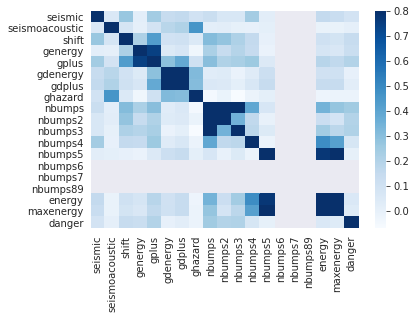

In [ ]:
df_corr=df1.corr()
sns.heatmap(df_corr,cmap='Blues',vmax=0.8)
plt.show()

In [ ]:
df.columns

Index(['seismic', 'seismoacoustic', 'shift', 'genergy', 'gplus', 'gdenergy',
       'gdplus', 'ghazard', 'nbumps', 'nbumps2', 'nbumps3', 'nbumps4',
       'nbumps5', 'nbumps6', 'nbumps7', 'nbumps89', 'energy', 'maxenergy',
       'danger'],
      dtype='object')

- Seismic v/s Danger

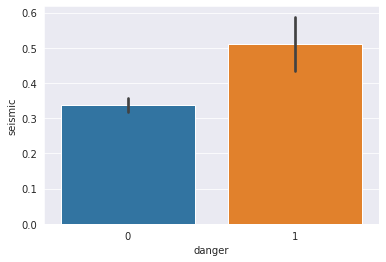

In [ ]:
sns.barplot(data=df1,x='danger',y='seismic')
plt.show()

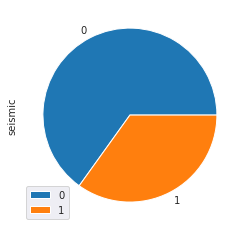

In [ ]:
un_seis=df1.seismic.value_counts()
un_seis.plot(kind='pie')
plt.legend()
plt.show()

- Seismoacoustic v/s danger

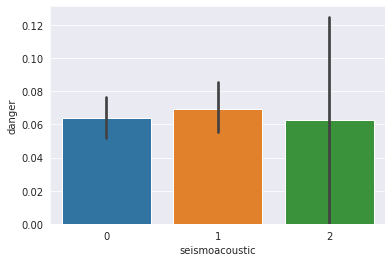

In [ ]:
sns.barplot(data=df1,x='seismoacoustic',y='danger')
plt.show()

- shift v/s danger

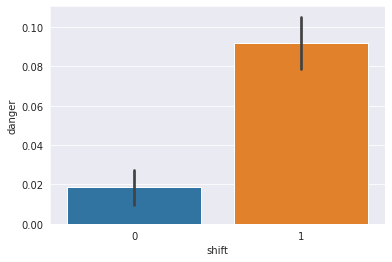

In [ ]:
sns.barplot(data=df1,x='shift',y='danger')

- genergy v/s danger v/s seismic v/s shift

In [ ]:
df1.genergy.nunique()

2212

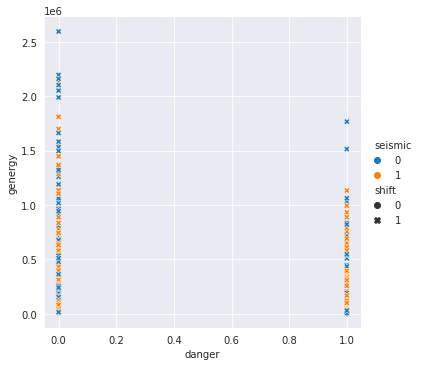

In [ ]:
sns.relplot(data=df1,x='danger',y='genergy',hue='seismic',style='shift')
plt.show()

- Gdenergy 

In [ ]:
df.gdenergy.nunique()

334

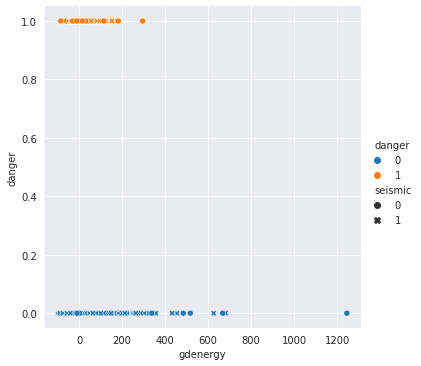

In [ ]:
sns.relplot(data=df1,x='gdenergy',y='danger',hue='danger',style='seismic')
plt.show()

- N Bumps

In [ ]:
un_1=df1.nbumps.value_counts()
un_2=df1.nbumps2.value_counts()
un_3=df1.nbumps3.value_counts()
un_4=df1.nbumps4.value_counts()
un_5=df1.nbumps5.value_counts()
un_6=df1.nbumps6.value_counts()
un_7=df1.nbumps7.value_counts()
un_8=df1.nbumps89.value_counts()

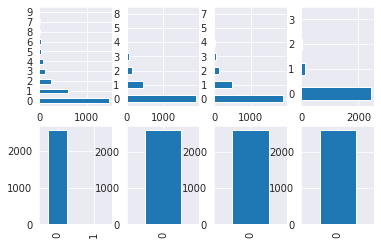

In [ ]:
plt.subplot(2,4,1)
un_1.plot(kind='barh')

plt.subplot(2,4,2)
un_2.plot(kind='barh')

plt.subplot(2,4,3)
un_3.plot(kind='barh')

plt.subplot(2,4,4)
un_4.plot(kind='barh')

plt.subplot(2,4,5)
un_5.plot(kind='bar')

plt.subplot(2,4,6)
un_6.plot(kind='bar')

plt.subplot(2,4,7)
un_7.plot(kind='bar')

plt.subplot(2,4,8)
un_8.plot(kind='bar')

plt.show()

- Energy

In [ ]:
un_en=df1.energy.value_counts()
df1.energy.nunique()

242

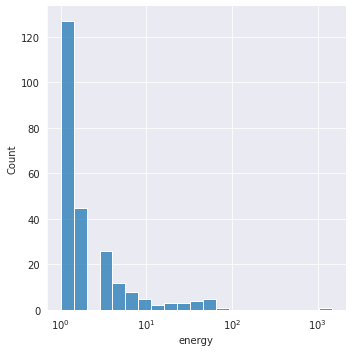

In [ ]:
sns.displot(un_en,log_scale=True)
plt.show()

- Energy v/s danger

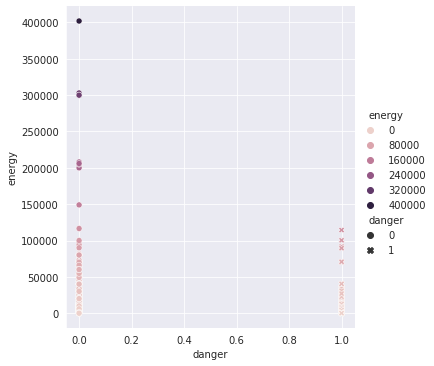

In [ ]:
sns.relplot(data=df1,x='danger',y='energy',hue="energy",style='danger')
plt.show()

- Maximum Energy
- the maximum energy of the seismic bumps registered within previous shift;

In [ ]:
un_max_en=df1.maxenergy.value_counts()
df1.maxenergy.nunique()

33

In [ ]:
Top_20=df1.maxenergy.sort_values(ascending=False)
top_20=Top_20[:21]

In [ ]:
#Top 20 high energy levels registered

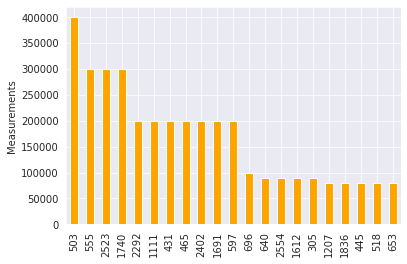

In [ ]:
top_20.plot(kind='bar',color='orange')
plt.ylabel("Measurements")
plt.show()

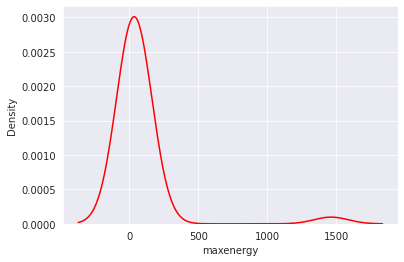

In [ ]:
sns.kdeplot(un_max_en,color='red')
plt.show()

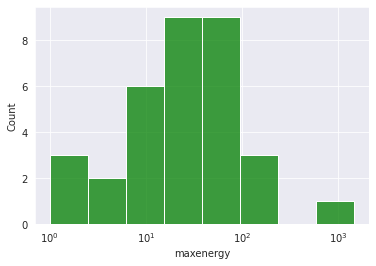

In [ ]:
sns.histplot(un_max_en,log_scale=True,color='green')
plt.show()

- Distribution of Danger class

In [ ]:
un_danger=df.danger.value_counts()
print((170/2414)*100)

7.042253521126761


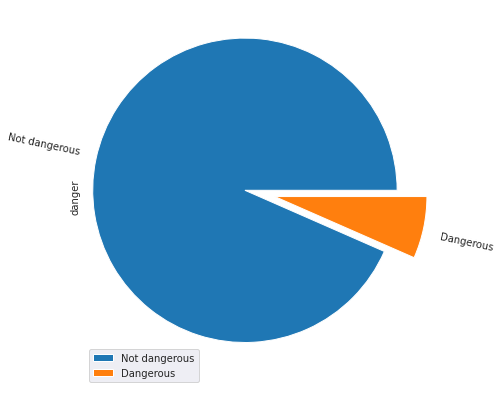

In [ ]:
plt.figure(figsize=(7,7))
my_lab=['Not dangerous','Dangerous']
my_exp=[0.2,0.0]
un_danger.plot(kind='pie',labels=my_lab,explode=my_exp,rotatelabels=True)
plt.legend()
plt.show()


- Only 7 percent of the sitiuations seem to be dangerous

## Model Building

In [ ]:
df1.head(1)

,seismic,seismoacoustic,shift,genergy,gplus,gdenergy,gdplus,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,danger
0,0,0,0,15180,48,-72,-72,0,0,0,0,0,0,0,0,0,0,0,0


- define target and data values

In [ ]:
Y=df1['danger']
X=df1.drop(columns=['danger'])
print(X,Y)

      seismic  seismoacoustic  shift  ...  nbumps89  energy  maxenergy
0           0               0      0  ...         0       0          0
1           0               0      0  ...         0    2000       2000
2           0               0      0  ...         0       0          0
3           0               0      0  ...         0    3000       3000
4           0               0      0  ...         0       0          0
...       ...             ...    ...  ...       ...     ...        ...
2579        1               0      1  ...         0       0          0
2580        1               0      1  ...         0       0          0
2581        1               0      1  ...         0       0          0
2582        0               0      1  ...         0       0          0
2583        0               0      1  ...         0       0          0

[2584 rows x 18 columns] 0       0
1       0
2       0
3       0
4       0
       ..
2579    0
2580    0
2581    0
2582    0
2583    0
Name: danger

- Splitting into train and test data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [ ]:
x_train

,seismic,seismoacoustic,shift,genergy,gplus,gdenergy,gdplus,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy
1938,0,0,0,2440,104,-71,-61,0,0,0,0,0,0,0,0,0,0,0
2101,0,0,0,7060,241,-44,-4,0,0,0,0,0,0,0,0,0,0,0
130,0,0,0,99160,514,-34,4,0,1,0,1,0,0,0,0,0,4000,4000
870,0,0,1,70740,154,-50,-36,0,0,0,0,0,0,0,0,0,0,0
2242,1,0,1,65350,1081,18,33,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,1,1,1,90960,2039,308,243,1,2,0,1,1,0,0,0,0,32000,30000
2204,0,2,1,54500,757,35,19,2,0,0,0,0,0,0,0,0,0,0
1718,1,1,1,31030,534,-8,0,0,1,1,0,0,0,0,0,0,600,600
675,0,0,1,95020,859,-20,-25,0,1,1,0,0,0,0,0,0,600,600


In [ ]:
y_train

1938    0
2101    0
130     0
870     0
2242    0
       ..
1549    0
2204    0
1718    0
675     0
1443    0
Name: danger, Length: 1808, dtype: int64

In [ ]:
y_test

1918    0
2446    0
455     0
1663    0
68      0
       ..
2009    0
1027    0
1451    0
1694    0
302     0
Name: danger, Length: 776, dtype: int64

In [ ]:
x_test

,seismic,seismoacoustic,shift,genergy,gplus,gdenergy,gdplus,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy
1918,0,0,1,19580,439,-44,-24,0,0,0,0,0,0,0,0,0,0,0
2446,0,0,0,1330,54,-88,-76,0,0,0,0,0,0,0,0,0,0,0
455,0,0,1,66680,430,-17,9,0,2,1,1,0,0,0,0,0,5400,5000
1663,0,0,1,24650,332,-29,-41,0,0,0,0,0,0,0,0,0,0,0
68,0,0,0,40210,193,-71,-59,0,1,0,1,0,0,0,0,0,5000,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,1,1,1,24750,548,-8,21,0,0,0,0,0,0,0,0,0,0,0
1027,0,0,0,1150,6,-59,-85,0,0,0,0,0,0,0,0,0,0,0
1451,0,1,0,8820,280,-4,-10,0,0,0,0,0,0,0,0,0,0,0
1694,1,1,1,26990,769,-20,-24,0,0,0,0,0,0,0,0,0,0,0


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(max_iter=400,random_state=100,)

- Training the model

In [ ]:
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=100, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

- accuracy of training

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
print(accuracy_score(log_reg.predict(x_train),y_train)*100)

91.26106194690266


In [ ]:
print(log_reg.predict(x_train))

[0 0 0 ... 0 0 0]


- Testing the model

- accuracy of testing

In [ ]:
print(accuracy_score(log_reg.predict(x_test),y_test)*100)

89.43298969072166


In [ ]:
print(classification_report(y_test,log_reg.predict(x_test)))
pd.crosstab(y_test,log_reg.predict(x_test))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       715
           1       0.11      0.05      0.07        61

    accuracy                           0.89       776
   macro avg       0.52      0.51      0.51       776
weighted avg       0.86      0.89      0.88       776



col_0,0,1
danger,,
0,691,24
1,58,3


In [ ]:
pd.DataFrame(log_reg.predict(x_test)).to_csv("LogisticReg_predictions.csv")

### Trying dimensionality reduction

In [ ]:
import numpy as np


In [ ]:
x=np.array(X)
y=np.array(Y)

In [ ]:
#PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [ ]:
import numpy as np

In [ ]:
data_pca=pca.fit_transform(x)

In [ ]:
print(x.shape,y.shape)

(2584, 18) (2584,)


In [ ]:
x_tr_pca,x_te_pca,y_tr_pca,y_te_pca=train_test_split(data_pca,y,test_size=0.3)
lr_pca=LogisticRegression()

In [ ]:
lr_pca.fit(x_tr_pca,y_tr_pca)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
tr_pca_pred=lr_pca.predict(x_tr_pca)
te_pca_pred=lr_pca.predict(x_te_pca)

In [ ]:
print("Training:",accuracy_score(tr_pca_pred,y_tr_pca)*100)
print("Testing:",accuracy_score(te_pca_pred,y_te_pca)*100)

Training: 82.52212389380531
Testing: 81.31443298969072


In [ ]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()

In [ ]:
data_lda=lda.fit_transform(x,y)

In [ ]:
x.shape

(2584, 18)

In [ ]:
x_tr_lda,x_te_lda,y_tr_lda,y_te_lda=train_test_split(data_lda,y,test_size=0.3)
lr_lda=LogisticRegression()

In [ ]:
lr_lda.fit(x_tr_lda,y_tr_lda)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
tr_lda_pred=lr_lda.predict(x_tr_lda)
te_lda_pred=lr_lda.predict(x_te_lda)

print("Training:",accuracy_score(tr_lda_pred,y_tr_lda)*100)
print("Testing:",accuracy_score(te_lda_pred,y_te_lda)*100)

Training: 92.86504424778761
Testing: 93.94329896907216


In [ ]:
print(classification_report(y_te_lda,lr_lda.predict(x_te_lda)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       729
           1       0.50      0.02      0.04        47

    accuracy                           0.94       776
   macro avg       0.72      0.51      0.50       776
weighted avg       0.91      0.94      0.91       776



In [ ]:
pd.crosstab(y_te_lda,lr_lda.predict(x_te_lda))

col_0,0,1
row_0,,
0,728,1
1,46,1


In [ ]:
pd.DataFrame(lr_lda.predict(x_te_lda)).to_csv("lr_lda_pred.csv")

### Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
nvb=GaussianNB()

- Training

In [ ]:
nvb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
print(accuracy_score(nvb.predict(x_train),y_train)*100)

90.87389380530973


-Test

In [ ]:
print(accuracy_score(nvb.predict(x_test),y_test)*100)

89.43298969072166


In [ ]:
print(classification_report(y_test,nvb.predict(x_test)))
pd.crosstab(y_test,nvb.predict(x_test))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       715
           1       0.24      0.16      0.20        61

    accuracy                           0.89       776
   macro avg       0.59      0.56      0.57       776
weighted avg       0.88      0.89      0.88       776



col_0,0,1
danger,,
0,684,31
1,51,10


In [ ]:
pd.DataFrame(nvb.predict(x_test)).to_csv("Naive_bayes_pred.csv")

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

- Train

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
print(accuracy_score(knn.predict(x_train),y_train)*100)

94.24778761061947


- Test

In [ ]:
print(accuracy_score(knn.predict(x_test),y_test)*100)

91.3659793814433


In [ ]:
print(classification_report(y_test,knn.predict(x_test)))
pd.crosstab(y_test,knn.predict(x_test))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       715
           1       0.00      0.00      0.00        61

    accuracy                           0.91       776
   macro avg       0.46      0.50      0.48       776
weighted avg       0.85      0.91      0.88       776



col_0,0,1
danger,,
0,709,6
1,61,0


In [ ]:
pd.DataFrame(knn.predict(x_test)).to_csv("KNN_pred.csv")

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=50)

- Train

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [ ]:
print(accuracy_score(rf.predict(x_train),y_train)*100)

100.0


- Test

In [ ]:
print(accuracy_score(rf.predict(x_test),y_test)*100)

91.88144329896907


In [ ]:
print(classification_report(y_test,rf.predict(x_test)))
pd.crosstab(y_test,rf.predict(x_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       715
           1       0.00      0.00      0.00        61

    accuracy                           0.92       776
   macro avg       0.46      0.50      0.48       776
weighted avg       0.85      0.92      0.88       776



col_0,0,1
danger,,
0,713,2
1,61,0


In [ ]:
pd.DataFrame(rf.predict(x_test)).to_csv("Random_forest_pred.csv")

In [ ]:
X=pd.DataFrame(X)
Y=pd.DataFrame(Y)

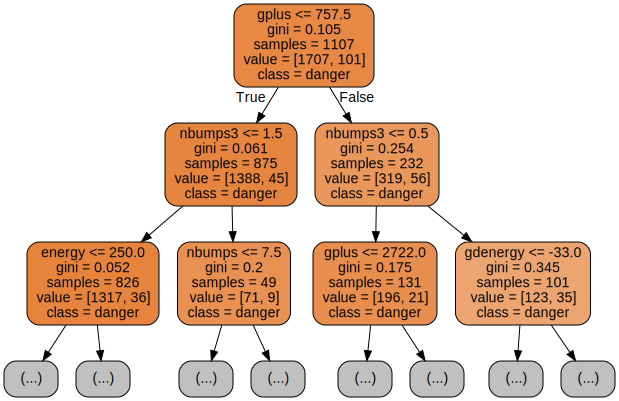

In [ ]:
import graphviz
from sklearn import tree
dot_data1=tree.export_graphviz(rf.estimators_[1],filled=True,rounded=True,max_depth=2,feature_names=X.columns,class_names=Y.columns)
graph1=graphviz.Source(dot_data1,format='png')
graph1

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_gini=DecisionTreeClassifier(max_depth=10,min_samples_leaf=15)

- Train

In [ ]:
dt_gini.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
print(accuracy_score(dt_gini.predict(x_train),y_train)*100)

94.08185840707965


- TesT

In [ ]:
print(accuracy_score(dt_gini.predict(x_test),y_test)*100)

90.59278350515464


In [ ]:
print(classification_report(y_test,dt_gini.predict(x_test)))
pd.crosstab(y_test,dt_gini.predict(x_test))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       715
           1       0.20      0.07      0.10        61

    accuracy                           0.91       776
   macro avg       0.56      0.52      0.52       776
weighted avg       0.87      0.91      0.88       776



col_0,0,1
danger,,
0,699,16
1,57,4


In [ ]:
pd.DataFrame(dt_gini.predict(x_test)).to_csv("Decision_tree_pred.csv")

In [ ]:
text_representation = tree.export_text(dt_gini)
print(text_representation)

|--- feature_8 <= 1.50
|   |--- feature_4 <= 2164.50
|   |   |--- feature_3 <= 18805.00
|   |   |   |--- feature_17 <= 3500.00
|   |   |   |   |--- feature_4 <= 599.00
|   |   |   |   |   |--- feature_5 <= -84.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_5 >  -84.50
|   |   |   |   |   |   |--- feature_17 <= 900.00
|   |   |   |   |   |   |   |--- feature_4 <= 219.00
|   |   |   |   |   |   |   |   |--- feature_6 <= -1.00
|   |   |   |   |   |   |   |   |   |--- feature_4 <= 208.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_4 >  208.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_6 >  -1.00
|   |   |   |   |   |   |   |   |   |--- feature_5 <= 6.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_5 >  6.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- 

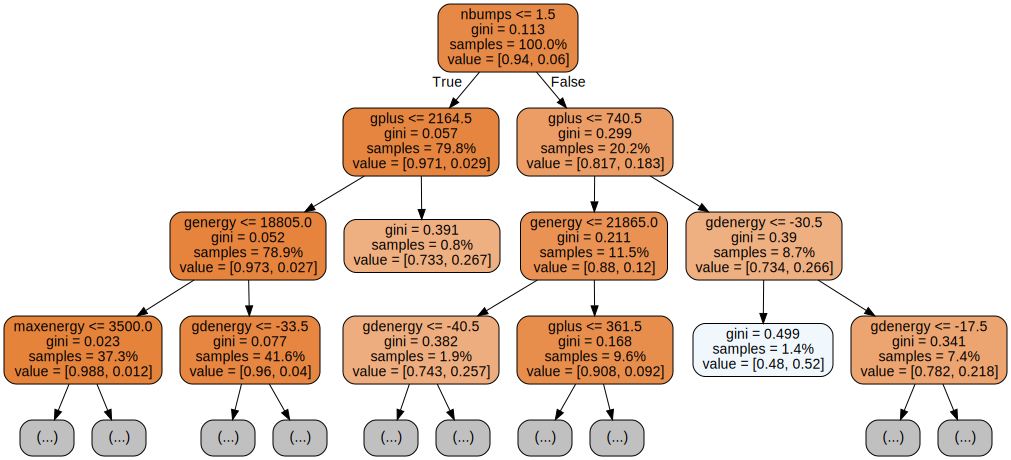

In [ ]:
import graphviz
dot_data=tree.export_graphviz(dt_gini,max_depth=3,filled=True,proportion=True,rounded=True,feature_names=X.columns)
graph=graphviz.Source(dot_data,format='png')
graph

In [ ]:
#Learning curve

In [105]:
from sklearn.model_selection import learning_curve

In [130]:
train_size,train_score,test_score=learning_curve(estimator=log_reg,X=x_train,y=y_train,cv=10)

In [131]:
train_size

array([ 162,  528,  894, 1260, 1627])

In [132]:
train_mean=np.mean(train_score,axis=1)
train_std=np.std(train_score,axis=1)
print(train_mean,train_std)

[0.93765432 0.9282197  0.9114094  0.91769841 0.91475108] [0.00185185 0.0171179  0.01247392 0.01206793 0.00781352]


In [133]:
test_mean=np.mean(test_score,axis=1)
test_std=np.std(test_score,axis=1)
print(test_mean,test_std)

[0.88607428 0.91871087 0.91150706 0.92093002 0.91372928] [0.01205429 0.01925075 0.01541478 0.01757778 0.0169235 ]


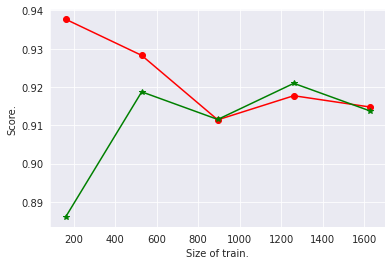

In [134]:
plt.plot(train_size,train_mean,c='red',marker="o",label="Train")
plt.plot(train_size,test_mean,c='green',marker='*',label='Test')
plt.xlabel("Size of train.")
plt.ylabel("Score.")
plt.show()